In [1]:
origin=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international loans by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international loans by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_loans_by_country.png')

#ax1.set(sub1)

NameError: name 'loans' is not defined

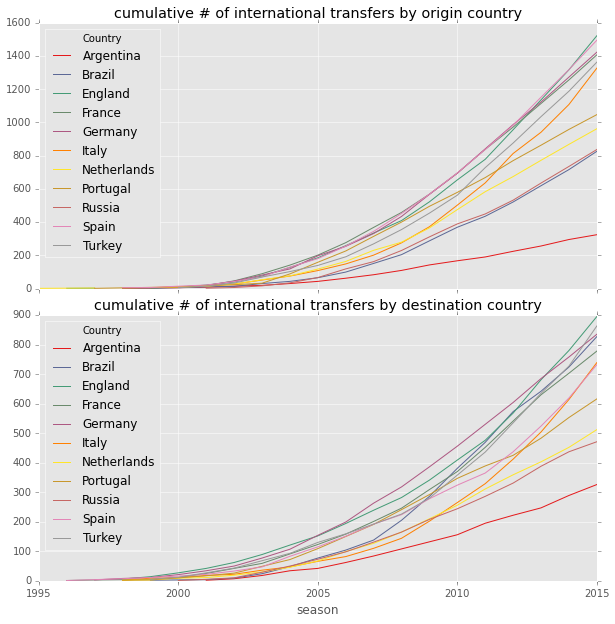

In [31]:
origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(27,50))&(nonloans['fromCountry'].isin(['England','Brazil','Argentina','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(27,50))&(nonloans['toCountry'].isin(['England','Brazil','Argentina','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international transfers by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international transfers by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_country.png')


#ax1.set(sub1)

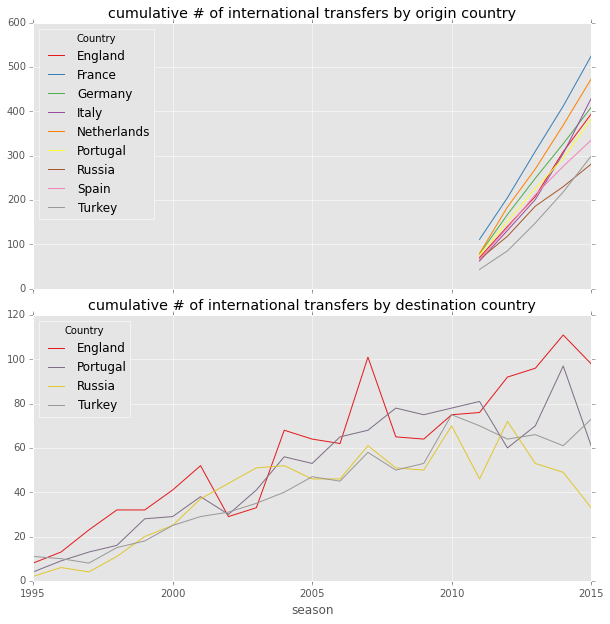

In [332]:
origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>2010)&(nonloans['Age'].between(20,25))&(nonloans['fromCountry'].isin(['England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia','Turkey']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['season']>0)&(nonloans['Age'].between(20,25))&(nonloans['toCountry'].isin(['England','Portugal','Russia','Turkey']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    #.cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative # of international transfers by origin country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative # of international transfers by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_country.png')


#ax1.set(sub1)

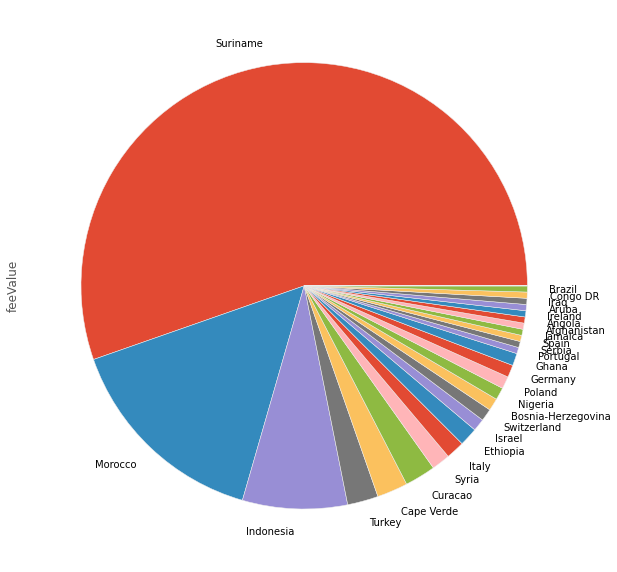

In [308]:
t=nonloans[(nonloans['toLeague']=='NL1')&(nonloans['Nationality']=='Netherlands')]
teamIdMap=t.drop_duplicates('fromTeamId')[['fromTeamId','fromTeamName']].set_index('fromTeamId').to_dict()['fromTeamName']

t.groupby('Nationality 2')[['feeValue']].count().sort_values('feeValue',ascending=False).rename(index=teamIdMap)['feeValue'].plot.pie(figsize=(10,10))

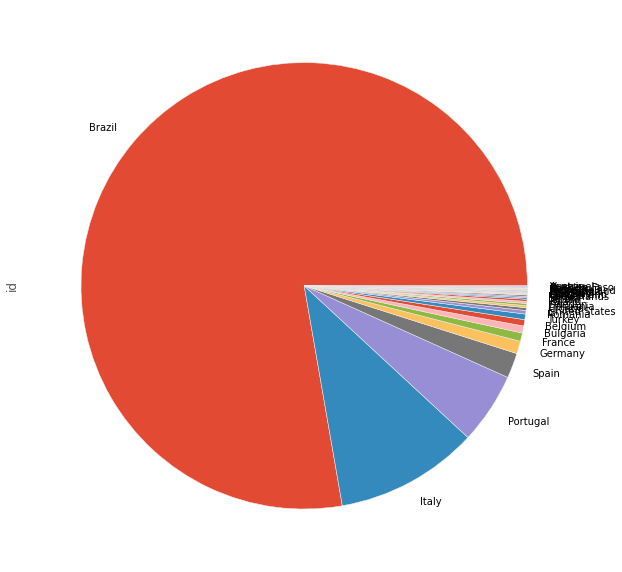

In [28]:
t=players[players['Nationality']=='Brazil'].copy()
t['Nationality 2']=np.where(t['Nationality 2'].isnull(),t['Nationality'],t['Nationality 2'])

t.groupby('Nationality 2')[['id']].count().sort_values('id',ascending=False).rename(index=teamIdMap)['id'].plot.pie(figsize=(10,10))

,# of intl transfers
season,
1929,1
1962,2
1964,1
1969,1
1972,1
1974,1
1976,1
1977,1
1979,4


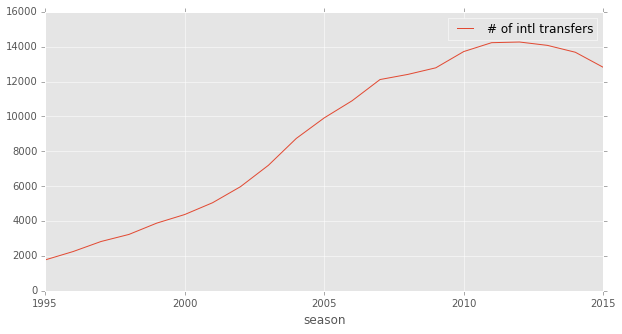

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True)

#()
t1=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry'].notnull()!=nonloans['toCountry'])].groupby('season')[['id']].count().rename(columns={'id': '# of intl transfers','feeValue':"declared fees (euro)"})
#t2=nonloans[nonloans['fromCountry']!=nonloans['toCountry']].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})
t1[['# of intl transfers']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))
t1

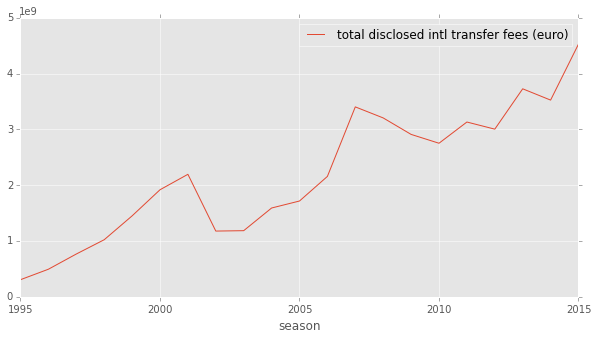

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True)

#()
t1=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry'].notnull()!=nonloans['toCountry'])].groupby('season')[['feeValue']].sum().rename(columns={'id': '# of intl transfers','feeValue':"total disclosed intl transfer fees (euro)"})
#t2=nonloans[nonloans['fromCountry']!=nonloans['toCountry']].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})
t1[['total disclosed intl transfer fees (euro)']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))

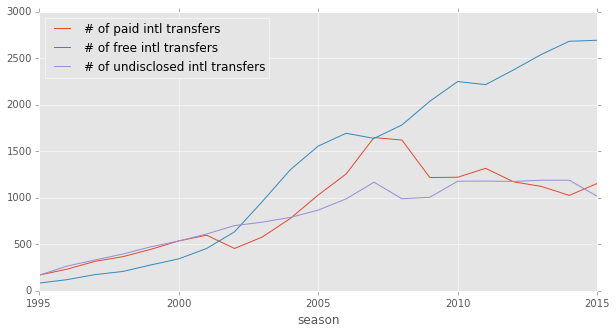

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True)

#()
t1=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry'].notnull()!=nonloans['toCountry'])&(nonloans['feeValue']>0)].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of paid intl transfers','feeValue':"declared fees (euro)"})
#t2=nonloans[nonloans['fromCountry']!=nonloans['toCountry']].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})
t2=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['feeValue']==0)].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of free intl transfers','feeValue':"declared fees (euro)"})
t3=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['feeValue'].isnull())].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of undisclosed intl transfers','feeValue':"declared fees (euro)"})

t1[['# of paid intl transfers']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))
t2[['# of free intl transfers']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))
t3[['# of undisclosed intl transfers']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))


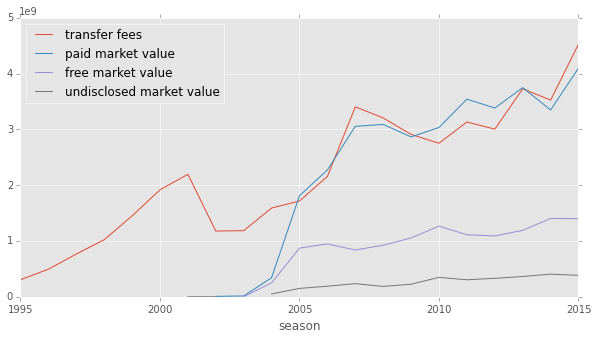

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True)

#()
t1=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry'].notnull()!=nonloans['toCountry'])&(nonloans['feeValue']>0)].groupby('season')[['id','feeValue','mv']].agg({'id':'count','feeValue':'sum','mv':'sum'}).rename(columns={'id': '# of paid intl transfers','feeValue':"transfer fees",'mv':'paid market value'})
#t2=nonloans[nonloans['fromCountry']!=nonloans['toCountry']].groupby('season')[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})
t2=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['feeValue']==0)].groupby('season')[['id','mv']].agg({'id':'count','mv':'sum'}).rename(columns={'id': '# of free intl transfers','mv':"free market value"})
t3=nonloans[(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['feeValue'].isnull())].groupby('season')[['id','mv']].agg({'id':'count','mv':'sum'}).rename(columns={'id': '# of undisclosed intl transfers','mv':"undisclosed market value"})

t1[['transfer fees']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))
t1[['paid market value']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))
t2[['free market value']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))
t3[['undisclosed market value']].rolling(window=1,center=False).mean().plot(ax=axes,xlim=(1995,2015))


In [53]:
r= nonloans[(~(nonloans['fromLeague'].fillna('Other').str.startswith('Other')))&(~(nonloans['toLeague'].fillna('Other').str.startswith('Other')))&(nonloans['fromCountry'].notnull())&(nonloans['toCountry'].notnull())&(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['feeValue'].isnull())].sort_values('mv',ascending=False) \
    [['id','Display name','fromCountry','fromTeamName','toCountry','toTeamName','mv','fee']] \

r

,id,Display name,fromCountry,fromTeamName,toCountry,toTeamName,mv,fee
8429,7691,Wálter Pandiani,Spain,Dep. La Coruña,England,Birmingham,10000000.0,?
31261,5880,Morgan De Sanctis,Italy,Udinese,Spain,Sevilla FC,8000000.0,?
140565,110326,Jucilei,United Arab Emirates,Al-Jazira,China,SD Luneng,7000000.0,?
27954,9415,Fernando Baiano,Brazil,São Caetano,Spain,Málaga CF,6000000.0,?
3037,3875,Jermain Defoe,United States,Toronto,England,Sunderland,6000000.0,?
3297,4038,Steve Finnan,England,Liverpool,Spain,Espanyol,5500000.0,?
57488,5854,Sébastien Frey,Italy,Genoa,Turkey,Bursaspor,5000000.0,?
29207,15094,Robert,Spain,Real Betis,Saudi Arabia,Ittihad,5000000.0,?
15998,21821,Luis Jiménez,Italy,Ternana,United Arab Emirates,Al-Ahli (UAE),5000000.0,?
33132,22750,Nilmar,Qatar,El-Jaish,Brazil,Internacional,5000000.0,?


In [223]:
t=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&~(nonloans['toCountry'].isnull())&(nonloans['season'].between(2010,2015))].groupby(['toTeamId','toTeamName'])[['id','feeValue']].agg({'id':'count','feeValue':'sum'}).rename(columns={'id': '# of transfers','feeValue':"declared fees (euro)"})

t.sort_values("# of transfers",ascending=False)[:10]

,,declared fees (euro),# of transfers
toTeamId,toTeamName,,
162.0,Monaco,272910000.0,68
683.0,Olympiacos,72295000.0,57
3057.0,Standard Liège,34780000.0,55
410.0,Udinese Calcio,87380000.0,54
294.0,Benfica,188860000.0,52
6321.0,Vancouver,4064000.0,52
12.0,AS Roma,193799000.0,49
336.0,Sporting CP,72226000.0,47
3205.0,Kayserispor,12220000.0,45


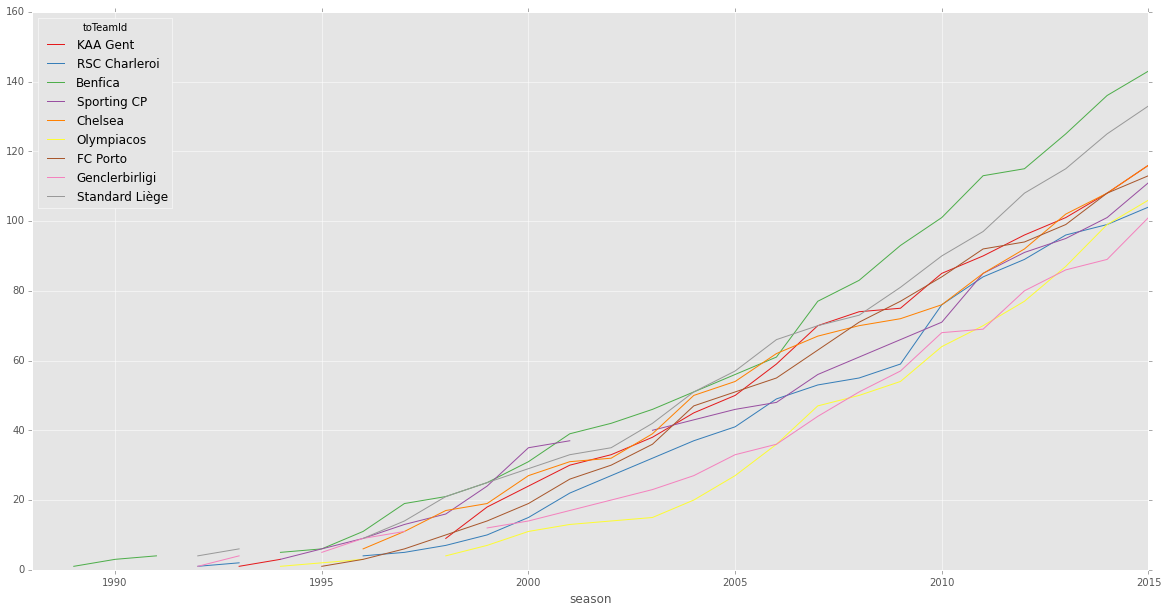

In [20]:
t=nonloans[(nonloans['toTeamId'].isin([294,3057,336,720,157,172,631,683,820]))&(nonloans['toCountry']!=nonloans['fromCountry'])] 

teamIdMap=t.drop_duplicates('toTeamId')[['toTeamId','toTeamName']].set_index('toTeamId').to_dict()['toTeamName']

#t.groupby(['season','fromTeamId'])['id'].count().rolling(window=1,center=False).mean().unstack().rename(columns=teamIdMap).plot(figsize=(20,10),colormap='Set1')
t.groupby(['season','toTeamId'])['id'].count().rolling(window=1,center=False).mean().unstack().cumsum().rename(columns=teamIdMap).plot(figsize=(20,10),colormap='Set1')

In [221]:
teamIdMap

{157.0: 'KAA Gent ',
 162.0: 'Monaco ',
 172.0: 'RSC Charleroi ',
 294.0: 'Benfica ',
 336.0: 'Sporting CP ',
 631.0: 'Chelsea ',
 683.0: 'Olympiacos ',
 720.0: 'FC Porto ',
 820.0: 'Genclerbirligi ',
 3057.0: 'Standard Li\xc3\xa8ge '}

In [27]:
nonloans[(nonloans['fromCountry']!='Romania')&(nonloans['toCountry']=='Cyprus')].groupby(('toTeamName','toLeague'))[['id']].count().sort_values('id',ascending=False)

,,id
toTeamName,toLeague,
Omonia Nikosia,ZYP1,66
Anor. Famagusta,ZYP1,64
AEK Larnaca,ZYP1,61
Apol. Limassol,ZYP1,60
AEL Limassol,ZYP1,59
APOEL Nicosia,ZYP1,52
Nea Salamis,ZYP1,48
En. Paralimni,ZYP1,47
Ermis Aradippou,ZYP1,45


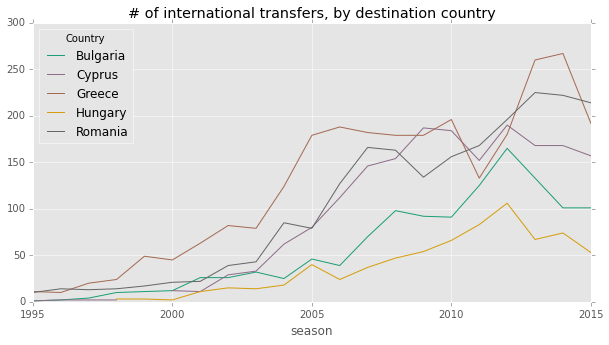

In [27]:
countrylist=['Romania','Cyprus','Greece']


destination=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toCountry'].isin(['Greece','Cyprus','Romania','Bulgaria','Hungary']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    #.cumsum()
    # .rolling(window=3,center=False).mean() \
    
#destination2=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])] \
#    .rename(columns={'toCountry':'Country'}).groupby(['season'])['id'].count()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True,sharey=False)


#origin.plot(ax=axes[0],colormap='Dark2',title="cumulative total # of international transfers, by source country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes,colormap='Dark2',title="# of international transfers, by destination country",xlim=(1995,2015))
#destination2.plot(ax=axes,colormap='Dark2')

plt.subplots_adjust(wspace=0,hspace=0.1)

#fig.savefig('intl_transfers_by_country_cyprus_etc.png')


#ax1.set(sub1)

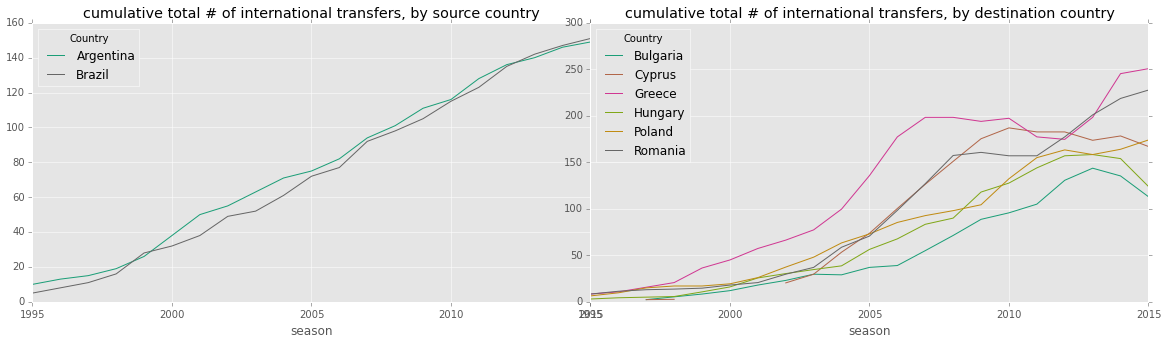

In [61]:
countrylist=['Romania','Cyprus','Greece']

origin=nonloans[('Italy'==nonloans['toCountry'])&(nonloans['fromCountry'].isin(['Argentina','Brazil']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['toCountry'].isin(['Greece','Cyprus','Romania','Bulgaria','Hungary','Poland']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack()    .rolling(window=3,center=False).mean() 
    #.cumsum() \

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Dark2',title="cumulative total # of international transfers, by source country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Dark2',title="cumulative total # of international transfers, by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

#fig.savefig('intl_transfers_by_country_cyprus_etc.png')


#ax1.set(sub1)

In [62]:
destination

Country,Bulgaria,Cyprus,Greece,Hungary,Poland,Romania
season,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,1.333333,1.666667
1988,NaN,NaN,NaN,NaN,1.333333,2.000000
1989,NaN,NaN,NaN,NaN,1.000000,1.666667
1990,NaN,NaN,1.000000,NaN,1.000000,1.333333
1991,NaN,NaN,1.333333,NaN,1.333333,1.333333
1992,NaN,NaN,3.000000,NaN,2.000000,2.333333
1993,NaN,NaN,4.666667,NaN,3.666667,3.666667


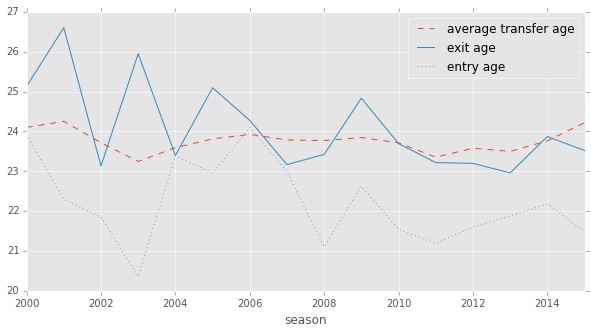

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True,sharey=False)

country='Netherlands'

w=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['feeValue']>0)&(nonloans['season']>=2000)]
t=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['feeValue']>0)&(nonloans['fromCountry'].str.startswith(country))&(nonloans['season']>=2000)]
s=nonloans[(nonloans['toCountry']!=nonloans['fromCountry'])&(nonloans['feeValue']>0)&(nonloans['toCountry'].str.startswith(country))&(nonloans['season']>=2000)]

w.groupby('season')['ageFloat'].mean().rolling(window=1,center=False).mean().rename('average transfer age').plot.line(ax=axes, ls='--', legend=True)
t.groupby('season')['ageFloat'].mean().rolling(window=1,center=False).mean().rename('exit age').plot.line(ax=axes,legend=True)
s.groupby('season')['ageFloat'].mean().rolling(window=1,center=False).mean().rename('entry age').plot.line(ax=axes, ls=':', legend=True)
#t[['season','Age']].groupby('season').describe()['Age'].unstack(level=0).ix['min':'max'].plot.box(ax=axes)

#(t.groupby('season')['Age'].count()).rolling(window=2,center=False).mean().plot.line(ax=axes)

In [199]:
#139150 
len(nonloans[nonloans['feeValue']!=0])

87541

In [9]:
nonloans[nonloans['toCountry'].fillna('').str.startswith('Czech')].groupby('Nationality')['id'].count().sort_values(ascending=False)[:10]

Nationality
Czech Republic        3783
Slovakia               489
Bosnia-Herzegovina      73
Brazil                  55
Serbia                  46
Croatia                 43
France                  20
Macedonia               19
Cote d'Ivoire           13
Slovenia                12
Name: id, dtype: int64

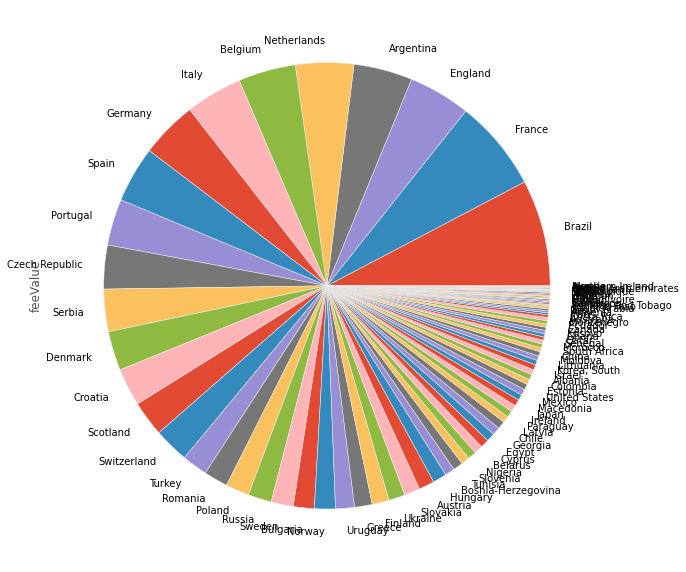

In [45]:
nonloans[(nonloans.feeValue>0)&(nonloans.fromCountry<>nonloans.toCountry)&nonloans.season.between(2000,2005)].groupby('fromCountry')['feeValue'].count().sort_values(ascending=False).plot.pie(figsize=(10,10))

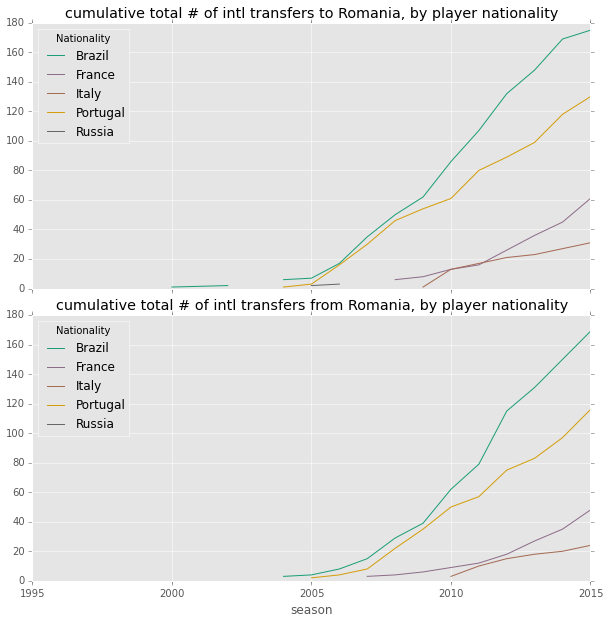

In [23]:



origin=nonloans[('Romania'==nonloans['toCountry'])&(nonloans['Nationality'].isin(['Portugal','Italy','France','Russia','Brazil']))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Nationality'])['id'].count().unstack() \
    .cumsum()

destination=nonloans[('Romania'==nonloans['fromCountry'])&(nonloans['Nationality'].isin(['Portugal','Italy','France','Russia','Brazil']))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Nationality'])['id'].count().unstack() \
    .cumsum()
    
    
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Dark2',title="cumulative total # of intl transfers to Romania, by player nationality",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Dark2',title="cumulative total # of intl transfers from Romania, by player nationality",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_transfers_by_nationality_romania.png')


#ax1.set(sub1)



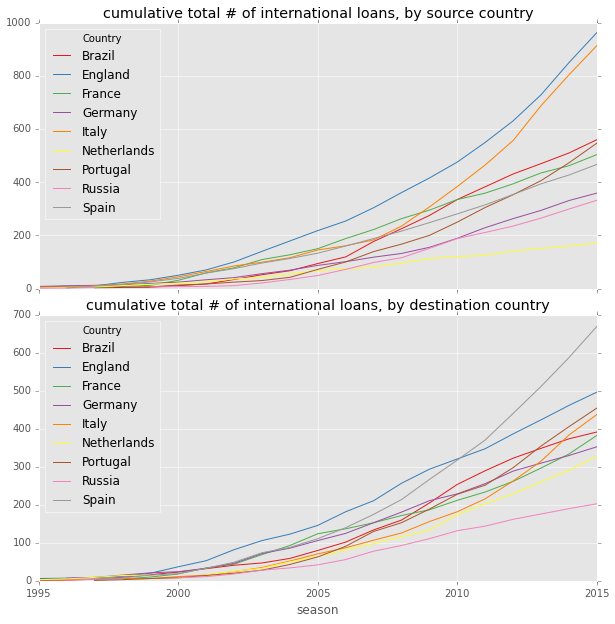

In [24]:
countrylist=['Brazil','England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia']

origin=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['fromCountry'].isin(countrylist))] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=loans[(loans['fromCountry']!=loans['toCountry'])&(loans['toCountry'].isin(countrylist))] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10),sharex=True,sharey=False)


origin.plot(ax=axes[0],colormap='Set1',title="cumulative total # of international loans, by source country",xticks=[1995,2000,2005,2010,2015])
destination.plot(ax=axes[1],colormap='Set1',title="cumulative total # of international loans, by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_loans_by_country.png')


#ax1.set(sub1)

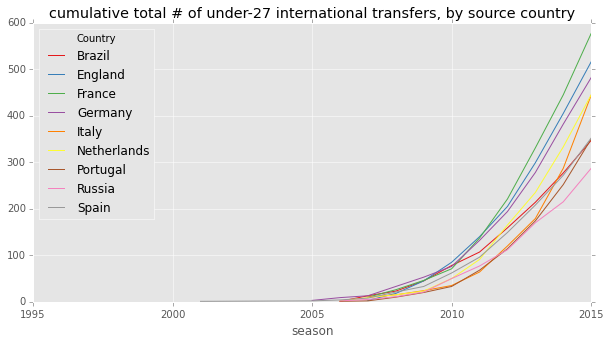

In [25]:
countrylist=['Brazil','England','Spain','Germany','Italy','France','Netherlands','Portugal','Russia']

origin=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['fromCountry'].isin(countrylist))&(nonloans['Age']<27)] \
    .rename(columns={'fromCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()
destination=nonloans[(nonloans['fromCountry']!=nonloans['toCountry'])&(nonloans['toCountry'].isin(countrylist))&(nonloans['Age']<27)] \
    .rename(columns={'toCountry':'Country'}).groupby(['season','Country'])['id'].count().unstack() \
    .cumsum()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5),sharex=True,sharey=False)


origin.plot(ax=axes,colormap='Set1',title="cumulative total # of under-27 international transfers, by source country",xticks=[1995,2000,2005,2010,2015])
#destination.plot(ax=axes[1],colormap='Set1',title="cumulative total # of under-27 international transfers, by destination country",xlim=(1995,2015))

plt.subplots_adjust(wspace=0,hspace=0.1)

fig.savefig('intl_u27_transfers_by_country.png')


#ax1.set(sub1)

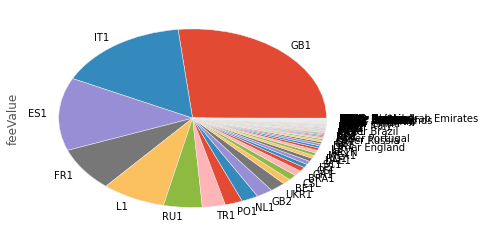

In [26]:
nonloans[(nonloans['season'].between(2000,2015))].groupby('toLeague')['feeValue'].sum().sort_values(ascending=False)[:100].plot.pie()

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (40,45,47,49,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (45,47,49,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  i

In [2]:
print len(players)
print len(transfers)
print transfers['id'].nunique()
print transfers[transfers.feeValue>0]['id'].nunique()
print len(nonloans)
print len(loans)

57678
346296
55775
12736
302872
43424


In [43]:
ew = pd.ExcelWriter('../sample.xls', encoding='utf-8')
transfers[transfers.id.isin(transfers['id'].drop_duplicates()[:1000])].to_excel(ew)
ew.save()
